
<br>
Cancer Detection Using Tensorflow :<br>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv')
print(df.head())
print(df.columns)
print(df.info())
print(df.describe().T)
print(df.isnull().sum())
print('\n')

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

benign_0__mal_1            0.000000    1.000000     1.000000     1.00000  
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64





 <br>
Exploratory Data Analysis :<br>


benign_0__mal_1            1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

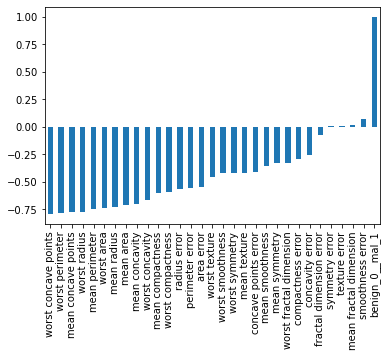

In [3]:
print(df.corr()['benign_0__mal_1'].sort_values(ascending=False))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')
plt.show()

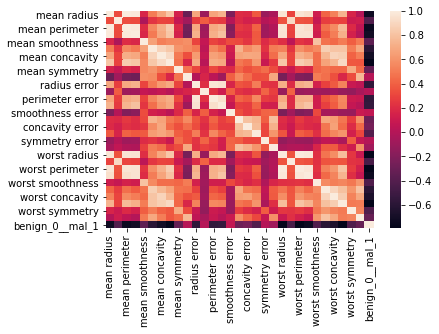

In [4]:
sns.heatmap(df.corr())
plt.show()

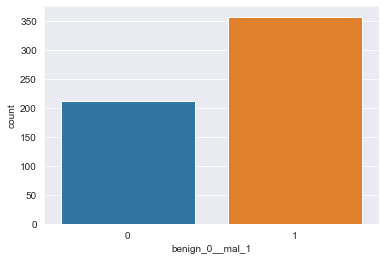

In [5]:
sns.set_style('darkgrid')
sns.countplot(x='benign_0__mal_1', data=df)
plt.show()

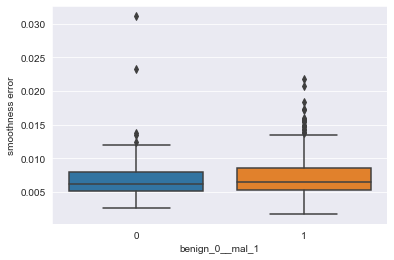

In [6]:
sns.boxplot(x='benign_0__mal_1', y='smoothness error', data=df)
plt.show()

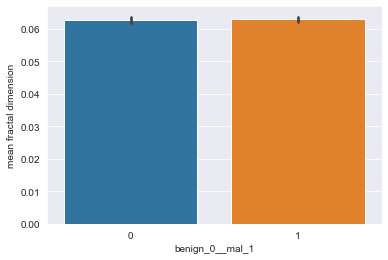

In [7]:
sns.barplot(x='benign_0__mal_1', y='mean fractal dimension', data=df)
plt.show()


 <br>
TRAIN AND SPLIT OF DATA :<br>


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=102)


 <br>
SCALING OF DATA :<br>


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
print(X_train.shape)

(398, 30)



 <br>
Creating A Classification Model As A Nerual Network :<br>
we will be adding units same as our features of X_train shape<br>


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [15]:
model = Sequential()

In [16]:
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

In [17]:
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam')


 <br>
Training The Model : <br>


In [19]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),verbose=1,epochs=450)

Epoch 1/450
13/13 [==============================] - 0s 34ms/step - loss: 0.6722 - val_loss: 0.6532
Epoch 2/450
13/13 [==============================] - 0s 12ms/step - loss: 0.6339 - val_loss: 0.6139
Epoch 3/450
13/13 [==============================] - 0s 14ms/step - loss: 0.5962 - val_loss: 0.5704
Epoch 4/450
13/13 [==============================] - 0s 13ms/step - loss: 0.5540 - val_loss: 0.5237
Epoch 5/450
13/13 [==============================] - 0s 12ms/step - loss: 0.5081 - val_loss: 0.4717
Epoch 6/450
13/13 [==============================] - 0s 19ms/step - loss: 0.4560 - val_loss: 0.4189
Epoch 7/450
13/13 [==============================] - 0s 16ms/step - loss: 0.4078 - val_loss: 0.3703
Epoch 8/450
13/13 [==============================] - 0s 13ms/step - loss: 0.3627 - val_loss: 0.3253
Epoch 9/450
13/13 [==============================] - 0s 9ms/step - loss: 0.3229 - val_loss: 0.2867
Epoch 10/450
13/13 [==============================] - 0s 9ms/step - loss: 0.2865 - val_loss: 0.2566
E

13/13 [==============================] - 0s 8ms/step - loss: 0.0502 - val_loss: 0.0960
Epoch 83/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0494 - val_loss: 0.1046
Epoch 84/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0520 - val_loss: 0.0960
Epoch 85/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0481 - val_loss: 0.1053
Epoch 86/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0527 - val_loss: 0.0965
Epoch 87/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0636 - val_loss: 0.1048
Epoch 88/450
13/13 [==============================] - 0s 9ms/step - loss: 0.0510 - val_loss: 0.0991
Epoch 89/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0472 - val_loss: 0.1030
Epoch 90/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0482 - val_loss: 0.1024
Epoch 91/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0481 - val_loss: 0.0988
Epoch 92/450


13/13 [==============================] - 0s 9ms/step - loss: 0.0386 - val_loss: 0.1148
Epoch 164/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0365 - val_loss: 0.1153
Epoch 165/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0332 - val_loss: 0.1196
Epoch 166/450
13/13 [==============================] - 0s 9ms/step - loss: 0.0342 - val_loss: 0.1168
Epoch 167/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0339 - val_loss: 0.1191
Epoch 168/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0332 - val_loss: 0.1192
Epoch 169/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0345 - val_loss: 0.1166
Epoch 170/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0368 - val_loss: 0.1197
Epoch 171/450
13/13 [==============================] - 0s 9ms/step - loss: 0.0328 - val_loss: 0.1214
Epoch 172/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0328 - val_loss: 0.1201
Epoc

13/13 [==============================] - 0s 8ms/step - loss: 0.0256 - val_loss: 0.1415
Epoch 245/450
13/13 [==============================] - 0s 10ms/step - loss: 0.0251 - val_loss: 0.1439
Epoch 246/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0252 - val_loss: 0.1419
Epoch 247/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0257 - val_loss: 0.1407
Epoch 248/450
13/13 [==============================] - 0s 9ms/step - loss: 0.0259 - val_loss: 0.1478
Epoch 249/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0282 - val_loss: 0.1441
Epoch 250/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0262 - val_loss: 0.1436
Epoch 251/450
13/13 [==============================] - 0s 9ms/step - loss: 0.0253 - val_loss: 0.1425
Epoch 252/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0248 - val_loss: 0.1439
Epoch 253/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0249 - val_loss: 0.1439
Epo

13/13 [==============================] - 0s 8ms/step - loss: 0.0206 - val_loss: 0.1638
Epoch 326/450
13/13 [==============================] - 0s 9ms/step - loss: 0.0210 - val_loss: 0.1695
Epoch 327/450
13/13 [==============================] - 0s 9ms/step - loss: 0.0250 - val_loss: 0.1614
Epoch 328/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0280 - val_loss: 0.1634
Epoch 329/450
13/13 [==============================] - 0s 9ms/step - loss: 0.0235 - val_loss: 0.1711
Epoch 330/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0228 - val_loss: 0.1695
Epoch 331/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0207 - val_loss: 0.1623
Epoch 332/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0242 - val_loss: 0.1734
Epoch 333/450
13/13 [==============================] - 0s 9ms/step - loss: 0.0260 - val_loss: 0.1753
Epoch 334/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0243 - val_loss: 0.1685
Epoc

13/13 [==============================] - 0s 8ms/step - loss: 0.0169 - val_loss: 0.1818
Epoch 407/450
13/13 [==============================] - 0s 11ms/step - loss: 0.0246 - val_loss: 0.1976
Epoch 408/450
13/13 [==============================] - 0s 10ms/step - loss: 0.0152 - val_loss: 0.1885
Epoch 409/450
13/13 [==============================] - 0s 9ms/step - loss: 0.0154 - val_loss: 0.1973
Epoch 410/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0172 - val_loss: 0.1886
Epoch 411/450
13/13 [==============================] - 0s 9ms/step - loss: 0.0169 - val_loss: 0.2028
Epoch 412/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0178 - val_loss: 0.1896
Epoch 413/450
13/13 [==============================] - 0s 9ms/step - loss: 0.0154 - val_loss: 0.1943
Epoch 414/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0163 - val_loss: 0.1942
Epoch 415/450
13/13 [==============================] - 0s 9ms/step - loss: 0.0156 - val_loss: 0.1987
Ep

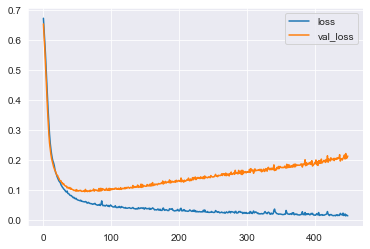

In [20]:
mod_loss_1=pd.DataFrame(model.history.history)
mod_loss_1.plot()
plt.show()


 <br>
The Above Plot has shown us the that validation data ' s loss has increased,<br>
which we dont want for our model ..so let us try to analyse it by  adding a <br>
callback function - EarlyStop<br>
EarlyStop Function Basically helps to prevent overfitting of our Data and tries to stop <br>
running of epochs , if it senses that the validation data loss has started to increase<br>
eventually..<br>


In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
model1 = Sequential()

In [23]:
model1.add(Dense(30, activation='relu'))
model1.add(Dense(15, activation='relu'))

In [24]:
model1.add(Dense(1,activation='sigmoid'))

In [25]:
model1.compile(loss='binary_crossentropy',optimizer='adam')

In [26]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

In [27]:
model1.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=450,
          verbose=1,callbacks=[early_stop])

Epoch 1/450
13/13 [==============================] - 0s 36ms/step - loss: 0.6845 - val_loss: 0.6702
Epoch 2/450
13/13 [==============================] - 0s 9ms/step - loss: 0.6448 - val_loss: 0.6317
Epoch 3/450
13/13 [==============================] - 0s 9ms/step - loss: 0.6106 - val_loss: 0.5964
Epoch 4/450
13/13 [==============================] - 0s 8ms/step - loss: 0.5743 - val_loss: 0.5531
Epoch 5/450
13/13 [==============================] - 0s 8ms/step - loss: 0.5336 - val_loss: 0.5079
Epoch 6/450
13/13 [==============================] - 0s 9ms/step - loss: 0.4911 - val_loss: 0.4623
Epoch 7/450
13/13 [==============================] - 0s 8ms/step - loss: 0.4482 - val_loss: 0.4154
Epoch 8/450
13/13 [==============================] - 0s 8ms/step - loss: 0.4043 - val_loss: 0.3708
Epoch 9/450
13/13 [==============================] - 0s 8ms/step - loss: 0.3610 - val_loss: 0.3274
Epoch 10/450
13/13 [==============================] - 0s 9ms/step - loss: 0.3261 - val_loss: 0.2906
Epoch 11

Epoch 83/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0631 - val_loss: 0.0987
Epoch 84/450
13/13 [==============================] - 0s 10ms/step - loss: 0.0550 - val_loss: 0.0952
Epoch 85/450
13/13 [==============================] - 0s 10ms/step - loss: 0.0546 - val_loss: 0.0962
Epoch 86/450
13/13 [==============================] - 0s 10ms/step - loss: 0.0535 - val_loss: 0.0974
Epoch 87/450
13/13 [==============================] - 0s 9ms/step - loss: 0.0539 - val_loss: 0.0964
Epoch 88/450
13/13 [==============================] - 0s 9ms/step - loss: 0.0548 - val_loss: 0.0977
Epoch 89/450
13/13 [==============================] - 0s 9ms/step - loss: 0.0526 - val_loss: 0.0947
Epoch 90/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0530 - val_loss: 0.1005
Epoch 91/450
13/13 [==============================] - 0s 9ms/step - loss: 0.0539 - val_loss: 0.0974
Epoch 92/450
13/13 [==============================] - 0s 8ms/step - loss: 0.0539 - val_loss: 0.09


 <br>
What the above line basically does is that it will try to to minimise the loss ,<br>
so it will monitor and keep track of 'val_loss',which is validation loss..<br>
and also..it will try to minimise it so .. the mode parameter has been set to ' min '<br>
and we have put the patience parameter to 25 .. it means that our epochs , even after callback<br>
of early stop will keep running 25 times moore..just to ensure proper fitting of data<br>
verbose has been set to 1 for logging output<br>


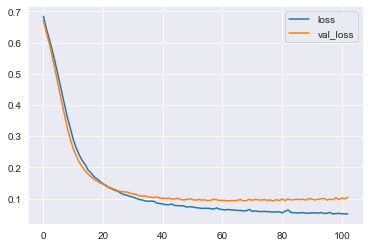

In [28]:
mod_loss_2=pd.DataFrame(model1.history.history)
mod_loss_2.plot()
plt.show()


 <br>
The latest plot obtained has shown us that our model 's performance has been improved<br>
but still validation data is still somewhat seems like been overfitted..<br>
so for this issue .. we can use dropout layers..<br>
Dropout layers basically just turn off some fraction of neurons randomly to ensure ,<br>
weights and biases are not updated and prevent overfitting of data..<br>


In [29]:
from tensorflow.keras.layers import Dropout

In [30]:
model2 = Sequential()

In [31]:
model2.add(Dense(30, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(15, activation='relu'))
model2.add(Dropout(0.5))

In [32]:
model2.add(Dense(1,activation='sigmoid'))

In [33]:
model2.compile(loss='binary_crossentropy',optimizer='adam')

In [34]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

In [35]:
model2.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=450,
          verbose=1,callbacks=[early_stop])

Epoch 1/450
13/13 [==============================] - 0s 27ms/step - loss: 0.7115 - val_loss: 0.6810
Epoch 2/450
13/13 [==============================] - 0s 9ms/step - loss: 0.6762 - val_loss: 0.6663
Epoch 3/450
13/13 [==============================] - 0s 10ms/step - loss: 0.6764 - val_loss: 0.6531
Epoch 4/450
13/13 [==============================] - 0s 10ms/step - loss: 0.6577 - val_loss: 0.6391
Epoch 5/450
13/13 [==============================] - 0s 10ms/step - loss: 0.6555 - val_loss: 0.6248
Epoch 6/450
13/13 [==============================] - 0s 9ms/step - loss: 0.6467 - val_loss: 0.6114
Epoch 7/450
13/13 [==============================] - 0s 10ms/step - loss: 0.6279 - val_loss: 0.5897
Epoch 8/450
13/13 [==============================] - 0s 10ms/step - loss: 0.5983 - val_loss: 0.5561
Epoch 9/450
13/13 [==============================] - 0s 9ms/step - loss: 0.5893 - val_loss: 0.5227
Epoch 10/450
13/13 [==============================] - 0s 9ms/step - loss: 0.5429 - val_loss: 0.4916
Epo

Epoch 83/450
13/13 [==============================] - 0s 9ms/step - loss: 0.1272 - val_loss: 0.1074
Epoch 84/450
13/13 [==============================] - 0s 9ms/step - loss: 0.1397 - val_loss: 0.1122
Epoch 85/450
13/13 [==============================] - 0s 9ms/step - loss: 0.1325 - val_loss: 0.1117
Epoch 86/450
13/13 [==============================] - 0s 9ms/step - loss: 0.1113 - val_loss: 0.1053
Epoch 87/450
13/13 [==============================] - 0s 9ms/step - loss: 0.1102 - val_loss: 0.1107
Epoch 88/450
13/13 [==============================] - 0s 9ms/step - loss: 0.1346 - val_loss: 0.1049
Epoch 89/450
13/13 [==============================] - 0s 8ms/step - loss: 0.1084 - val_loss: 0.1074
Epoch 90/450
13/13 [==============================] - 0s 9ms/step - loss: 0.1216 - val_loss: 0.1042
Epoch 91/450
13/13 [==============================] - 0s 9ms/step - loss: 0.1198 - val_loss: 0.1125
Epoch 92/450
13/13 [==============================] - 0s 9ms/step - loss: 0.1263 - val_loss: 0.1086



 <br>
Generally You can keep any value of dropout you want between 0 to 1,comprising a fraction of <br>
0 to 100 %<br>
usually we keep value between 0.2 to 0.5, which is 20 to 50 % respectively<br>


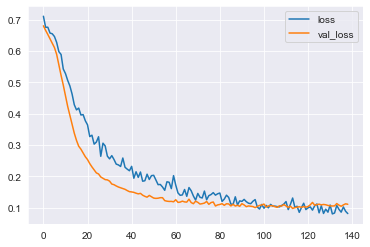

In [36]:
mod_loss_3=pd.DataFrame(model2.history.history)
mod_loss_3.plot()
plt.show()


 <br>
So as you can see the above plot..our model ' s performance has been increased much better <br>
by now...<br>
Metrics and Evaluation : <br>


In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [38]:
predictions=model2.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [39]:
print(predictions)

[[1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]]


In [40]:
print("y test shape :",y_test.shape)
print("Predictions shape : ",predictions.shape)
predictions=predictions.reshape(171,)

y test shape : (171,)
Predictions shape :  (171, 1)


In [43]:
mod_comp_df=pd.DataFrame({'Actual Class ':y_test,'Predicted Class':predictions})
comp=mod_comp_df.head(20)
comp

,Actual Class,Predicted Class
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,1,1
6,1,1
7,1,1
8,1,1
9,0,0


In [44]:
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print("The Accuracy Score : ",round(accuracy_score(y_test,predictions),2))



[[ 55   4]
 [  1 111]]


              precision    recall  f1-score   support

           0       0.98      0.93      0.96        59
           1       0.97      0.99      0.98       112

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



The Accuracy Score :  0.97
